<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/Linear_Regression_with_Multiple_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.7.0


In [2]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt

data= pd.read_csv('ex1data2.txt',header=None,error_bad_lines=False)

--2021-11-14 11:53:06--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt.3’

ex1data2.txt.3      100%[===================>]     657  --.-KB/s    in 0s      

2021-11-14 11:53:06 (39.1 MB/s) - ‘ex1data2.txt.3’ saved [657/657]



In [4]:
data.columns=('house_size','bedrooms','house_price')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


In [5]:
#feature_normalization
def feature_normalization(x,mean=np.zeros(1),std=np.zeros(1)):
  x=np.array(x)
  if len(mean.shape) ==1 or len(std.shape)==1:
     mean = np.mean(x, axis=0)
     std = np.std(x, axis=0, ddof=1)
  x=(x-mean)/std
  return x,mean,std


In [6]:
x_norm, mu, sigma = feature_normalization(data[['house_size', 'bedrooms']])

In [7]:
data['house_size_normalized'] = x_norm[:,0]
data['bedrooms_normalized'] = x_norm[:,1]
data[['house_size_normalized', 'bedrooms_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,1.889741e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
bedrooms_normalized,47.0,2.651543e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


In [14]:
def compute_cost(x, y, theta):
    m = y.shape[0]
    h = x.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [15]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = x.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(x))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(x, y, theta)

    return theta, J_history

In [16]:
m=data.shape[0]
x=np.hstack((np.ones((m,1)),x_norm))
y=np.array(data.house_price.values).reshape(-1,1)
theta=theta = np.zeros(shape=(x.shape[1],1))
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

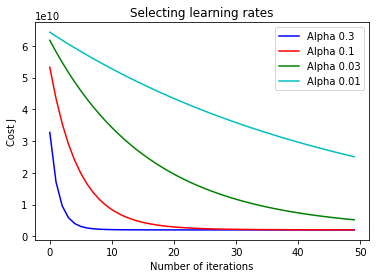

In [18]:
for i in range (0,len(alpha)):
  theta = np.zeros(shape=(x.shape[1],1))
  theta, J_history=gradient_descent(x, y, theta, alpha[i], num_iters)
  plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))

plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [ ]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)